In [1]:
%load_ext autoreload

In [16]:
%autoreload 2
import uscensus

In [3]:
import sqlite3

In [4]:
cache = uscensus.DBAPICache(sqlite3, database='uscensus.db')

In [5]:
from configparser import RawConfigParser

In [6]:
cp = RawConfigParser()

In [7]:
cp.read('C:/cygwin64/home/nkrishna/.census')

['C:/cygwin64/home/nkrishna/.census']

In [8]:
# Work around for some Windows TLS issues

import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.poolmanager import PoolManager
import ssl

class MyAdapter(HTTPAdapter):
    def init_poolmanager(self, connections, maxsize, block=False):
        self.poolmanager = PoolManager(num_pools=connections,
                                       maxsize=maxsize,
                                       block=block,
                                       ssl_version=ssl.PROTOCOL_TLSv1_2)
s = requests.Session()
s.mount('https://', MyAdapter())

In [17]:
%%time
cl = uscensus.CensusLoader(
    cp.get('census','api_key'),
    cache,
    session=s
)

Error processing metadata; skipping API: {'c_variablesLink': 'http://api.census.gov/data/timeseries/poverty/histpov2/variables.json', 'description': 'The Current Population Survey (CPS), sponsored jointly by the U.S. Census Bureau and the U.S. Bureau of Labor Statistics (BLS), is the primary source of labor force statistics for the population of the United States. The CPS is the source of numerous high-profile economic statistics, including the national unemployment rate, and provides data on a wide range of issues relating to employment and earnings. The CPS also collects extensive demographic data that complement and enhance our understanding of labor market conditions in the nation overall, among many different population groups, in the states and in substate areas.', 'c_isCube': True, 'c_dataset': ['timeseries', 'poverty', 'histpov2'], 'modified': '2016-09-13', 'contactPoint': {'hasEmail': 'dsd.ferrett@census.gov', 'fn': 'Current Population Survey Office'}, 'accessLevel': 'public',

In [18]:
res = cl.index.query('education')
for hit in res:
    print(hit)

{'title': '2012 Public Elementary-Secondary Education Finance: Individual Unit Tables', 'score': 5.400202411215218, 'api_id': '2012/pubschlfin'}
{'title': 'Time Series Longitudinal Employer-Household Dynamics - QWI: Sex by Education', 'score': 5.400202411215218, 'api_id': 'timeseries/qwi/se'}


In [19]:
cl.search('education')

[2012 Public Elementary-Secondary Education Finance: Individual Unit Tables,
 Time Series Longitudinal Employer-Household Dynamics - QWI: Sex by Education]

In [20]:
cl.search('concepts:Income')

[2012 American Community Survey: 3-Year Estimates,
 2012 American Community Survey: 1-Year Estimates,
 2015 American Community Survey 1-Year Estimates,
 2014 American Community Survey 1-Year Estimates,
 2013 American Community Survey - Summarized Data: 1-Year Summary File,
 2011-2013 American Community Survey - Summarized Data: 3-Year Summary File,
 2000 Decennial: Summary File 3,
 2010-2014 American Community Survey 5-Year Estimates,
 2011-2015 American Community Survey 5-Year Estimates,
 2008-2012 American Community Survey - Summarized Data: 5-Year Summary File,
 2009-2013 American Community Survey 5-Year Estimates,
 2006-2010 American Community Survey 5-Year Estimates,
 2005-2009 American Community Survey 5-Year Estimates,
 2011 American Community Survey: 5-Year Estimates,
 2014 American Community Survey Supplemental Estimates,
 2015 American Community Survey Supplemental Estimates]

In [21]:
api=_[-1]

In [22]:
api.variables

{'K202002_002EA': {'concept': 'K202002. Median Earnings in the Past 12 Months (in 2015 Inflation-Adjusted Dollars) by Sex by Work Experience in the Past 12 Months for the Population 16 Years and Over With Earnings in the Past 12 Months',
  'label': 'Median earnings in the past 12 months (in 2015 Inflation-adjusted dollars) --!!Male --!!Total (dollars)',
  'predicateType': 'string'},
 'K201401_001M': {'concept': 'K201401. School Enrollment by Level of School for the Population 3 Years and Over',
  'label': 'Margin of Error for!!Total:',
  'predicateType': 'int'},
 'K202504_001MA': {'concept': 'K202504. Units in Structure',
  'label': 'Margin of Error for!!Total:',
  'predicateType': 'string'},
 'K201802_006M': {'concept': 'K201802. Work Experience by Disability Status',
  'label': 'Margin of Error for!!Worked less than full-time, year round:!!With a disability',
  'predicateType': 'int'},
 'K201601_007E': {'concept': 'K201601. Household Language',
  'label': 'Other languages:!!Limited E

In [23]:
api.variables['K202511_001E']

{'concept': 'K202511. Median Gross Rent (Dollars)',
 'label': 'Median gross rent',
 'predicateType': 'int'}

In [24]:
med_rent_by_county = api(['K202511_001E'], geo_for={'county': '*'})
med_rent_by_county.set_index(['state', 'county'], inplace=True)
med_rent_by_county.sort_index(inplace=True)
med_rent_by_county

K202511_001E
state county              
01    001            813.0
      003            914.0
      005            527.0
      007            697.0
      009            627.0
      013            567.0
      015            711.0
      017            680.0
      019            567.0
      021            723.0
      025            467.0
      031            658.0
      033            638.0
      039            602.0
      043            621.0
      045            650.0
      047            542.0
      049            645.0
      051            815.0
      053            548.0
      055            650.0
      059            529.0
      061            509.0
      069            713.0
      071            612.0
      073            823.0
      077            644.0
      079            563.0
      081            840.0
      083            605.0
...                    ...
72    081            340.0
      085            509.0
      087            317.0
      091            526.0
      097            353.0
      099            484.0
      101            485.0
      103            435.0
      105            395.0
      107            361.0
      111            452.0
      113            322.0
      115            447.0
      119            435.0
      121            528.0
      123            311.0
      125            349.0
      127            409.0
      129            408.0
      131            369.0
      133            300.0
      135            617.0
      137            490.0
      139            456.0
      141            240.0
      143            422.0
      145            563.0
      149            342.0
      151            402.0
      153             99.0

[1901 rows x 1 columns]

In [25]:
api.vintage

2015

In [16]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import fiona
import geopandas as gpd
import shapely
import qgrid

In [3]:
%%time
# Generated in GetCountyShapes.ipynb
counties_df = gpd.GeoDataFrame.from_file('counties.geojson',
                                         driver='GeoJSON')
counties_df.crs = fiona.crs.from_epsg(4326)

Wall time: 1min 1s


In [4]:
%time
counties_df.set_index(['STATE', 'COUNTY'], inplace=True)
counties_df.sort_index(inplace=True)

Wall time: 0 ns


In [5]:
%time
counties_df.index.names=['state','county']
joined = counties_df.join(med_rent_by_county)

Wall time: 0 ns


NameError: name 'med_rent_by_county' is not defined

In [ ]:
#joined.total_bounds
continental = shapely.geometry.box(-125.0011, 24.9493, -66.9326, 49.5904)
joined_cont = joined[joined.intersects(continental)]

In [ ]:
axes=joined_cont.plot(column='K202511_001E', figsize=(15,15))
axes.figure.dpi=190
axes

In [ ]:
joined_cont.head()

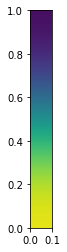

In [23]:
import matplotlib as mpl
import numpy as np
inc_min=joined_cont['K202511_001E'].min()
inc_max=joined_cont['K202511_001E'].max()
X = [[0, 0], [.9, .9]]
plt.gca().imshow(X, interpolation='bicubic', cmap=mpl.cm.get_cmap(),
          extent=(0, .1, 0, 1), alpha=1)